In [130]:
# -Regression is a method of modelling a target value based on independent predictors. 
# This method is mostly used for forecasting and finding out cause and effect 
# relationship between variables. Regression techniques mostly differ based on the 
# number of independent variables and the type of relationship between the independent 
# and dependent variables.

# -Simple linear regression is a type of regression analysis where the number of 
# independent variables is one and there is a linear relationship between the 
# independent(x) and dependent(y) variable.

In [191]:
import numpy as np
import pandas as pd
import pylab as plt
import math  
from mpl_toolkits.mplot3d import Axes3D

In [192]:
# load the data
X = []
Y = []

In [193]:
data = pd.read_csv('data-2d.csv')
data.head()

,17.9302012052,94.5205919533,320.259529602
0,97.144697,69.593282,404.634472
1,81.775901,5.737648,181.485108
2,55.854342,70.325902,321.773638
3,49.366550,75.114040,322.465486
4,3.192702,29.256299,94.618811


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
17.9302012052    99 non-null float64
94.5205919533    99 non-null float64
320.259529602    99 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [195]:
for line in open('data-2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1])
    Y.append(float(y))

In [196]:
# turn X and Y into numpy arrays

In [197]:
X = np.array(X)
Y = np.array(Y)

In [198]:
# plot the data

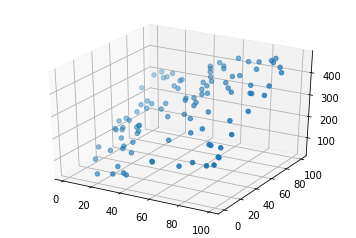

In [199]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [200]:
# -Calculate Yhat
# -Calculate the mean value of a list of numbers, y mean:
# or np.mean(Y)

In [201]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)


def mean(values):
    return sum(values) / float(len(values))

Ymean = mean(Y)
Ymean

265.3344903173161

In [202]:
# MODEL
# the sum of square(due to regression):

In [215]:
SSr = np.sum((Yhat - Ymean)**2)
SSr

1118013.3731670508

In [216]:
# RESIDUAL
# the sum of square(due to error):

In [217]:
SSe = np.sum((Y - Yhat)**2)
SSe

2235.9490345569566

In [213]:
# TOTAL
# the the sum of square(total):

In [218]:
SSt = np.sum((Y - Ymean)**2)
SSt

1120249.3222016029

In [208]:
# test:

In [220]:
SSt2 = SSr + SSe
SSt2

1120249.3222016077

In [150]:
# R2
# -determine how good the model is by computing the r-squared
# -perfect value of r2 = 1 means the perfect linear relationship. 
# -when the value decreases it means weaker relationship of the observations
# (x is explaining less of y)
# -r2 = 0 means no linear relationship

# FORMULA: R2 =SSR/SST = 1 − SSE/SST

In [151]:
r2 = ssr / sst
r2

0.9980040612475821

In [152]:
# n
# number of obs, n

In [153]:
n = Y.size
n

100

In [154]:
# ****confused****
# p
# - everytime we include a new variable the r2 is increased, we keep adding
# and the r2 keeps increasing, this is greatsince the model will get better.
# but when we look at the adj r2 if wesee the value of adj r2 decreases when 
# n variable added, say its now 5 variables, this indicates that we had the best 
# situation when we had 4 variables not when 5 variables

# -The model is multiple because we have k > 1 predictors.
# -If k = 1, we have a simple linear regression model

# p-value, p = number of explanatory (X variables), coefficients

In [155]:
p = 3

In [156]:
# Adj R2
# -tutorial: https://www.youtube.com/watch?v=4otEcA3gjLk
# - as k increases adj r2 will tend to decrease(holding everything else constant), 
# reflecting the reduced power in the model when you have low numbers of df.
# - if we add useful variables to the model, adj will also increase, nut if we
# are adding use less variables then the adj r2 will decreases to reflect the
# fact that you have lost degrees of freedom.
# - the value is not bounded to 0 and 1, it can be negative
# - the higher the value of adj r2, better the model is in terms of explanatory 
# power.
# -0 ≤ R2 ≤ 1
# -Large R2 values do not necessarily imply a good model

In [157]:
adjr2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
adjr2

0.997941688161569

In [158]:
# DEGREES OF FREEDOM (MODEL/ REGRESSION)
# Regression df is the number of independent variables in our regression model.

In [222]:
DFr = p
DFr

3

In [160]:
# DEGREES OF FREEDOM (RESIDUAL/ ERROR)

In [161]:
DFe = n - p - 1
DFe

96

In [162]:
# DEGREES OF FREEDOM (TOTAL)
# tutorial: 
# https://www.youtube.com/watch?v=4otEcA3gjLk&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=2
# https://www.youtube.com/watch?v=-4aiKmPC994
# https://www.youtube.com/watch?v=VIlVWeUQ0vs

# -when, number of obs, n = 10, 
# number of variables, k = 7 
# then df = 10 - 7 - 1 = 2, that's not much at all.. it's not a very healthy regression
# we need quite a few degrees of freedom to actually be able to explain anything to get
# to allow the model to have error to see whether the two or three or four variables are
# related to each other.
# -for plane 3 obs/var needed. so in this case for n obs, df = n - 3

# FORMULA: dfT = dfR + dfE

In [223]:
DFt = n - 1
DFt

99

In [228]:
# Mean Absolute Error, or L1 loss, MAE:

In [224]:
mae = np.sum(np.absolute(Yhat - Y))
mae

387.4159675765236

In [226]:
# Regression MS
# FORMULA: Regression MS = ∑ (ŷ — ӯ)²/Reg. df

In [229]:
RegressionMS = np.sum(((Yhat - Ymean)**2)/dfR)
RegressionMS

372671.1243890169

In [230]:
# Residual MS
# FORMULA: Residual MS = ∑ (y — ŷ)²/Res. df

In [170]:
ResidualMS = np.sum(((Y - Yhat)**2)/dfR)
ResidualMS

745.3163448523188

In [171]:
# MSE — Mean Squared Error for cost function
# Mean Squared Errors (MS) — are the mean of the sum of squares or the sum of squares 
# divided by the degrees of freedom for both, regression and residuals.

In [172]:
mse = np.sum((Yhat - Y)**2) / n
mse

22.359490345569565

In [173]:
# F — is used to test the hypothesis that the slope of the independent variable is zero. 
# Mathematically, it can also be calculated as

In [174]:
F = RegressionMS / ResidualMS
F

500.01737780601076

In [175]:
# STANDERD ERROR — provides the estimated standard deviation of the distribution of 
# coefficients. It is the amount by which the coefficient varies across different cases. 
# A coefficient much greater than its standard error implies a probability that the 
# coefficient is not 0.

# FORMULA: Std. Error = √(Res.MS)

In [176]:
StdError = math.sqrt(ResidualMS)
StdError

27.300482502188835

In [177]:
# - t-Stat — is the t-statistic or t-value of the test and its value is equal to the 
# coefficient divided by the standard error.
# - the larger the coefficient with respect to the standard error, the larger the 
# t-Stat is and higher the probability that the coefficient is away from 0.

# FORMULA: t-Stat = Coefficients/Standard Error

In [ ]:
t = 